# EE697 Graduation Project
# Linear Regression on Current Mirror Dataset
## Spring 2024

In [1]:
# Import libraries numpy, pandas, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [2]:
# Read the csv file
df = pd.read_csv('CurrentMirrorData.csv')

print(df) 

              W1         W2        L1        L2           Rd       Vth  \
0      11.535273  11.253561  1.635002  1.554789  11168.33570  1.099097   
1      11.657013   5.283991  2.276355  2.245678  16266.83301  0.938749   
2      10.034344   9.749873  1.423870  1.907299  11427.57885  1.078170   
3       5.314317   9.953446  1.908284  1.532619  25629.44160  0.828420   
4      12.633453   8.264820  2.005792  1.739820  21953.00888  1.111356   
...          ...        ...       ...       ...          ...       ...   
24995   6.120787  12.707425  1.266015  1.679263  12014.25296  0.945106   
24996   6.286746  11.723673  1.353313  1.674134  20768.56104  1.096102   
24997   5.738515  14.639721  1.266029  1.259818  11761.42361  0.842320   
24998   6.781429   6.016140  1.949894  1.743846  27415.10166  1.090841   
24999   6.874803  12.104731  2.615622  1.184040  21514.34417  1.152232   

            Vdd     I_ref        I0        MR  
0      2.824552  0.000010  0.000010  1.028689  
1      6.022707

In [3]:
# Show info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W1      25000 non-null  float64
 1   W2      25000 non-null  float64
 2   L1      25000 non-null  float64
 3   L2      25000 non-null  float64
 4   Rd      25000 non-null  float64
 5   Vth     25000 non-null  float64
 6   Vdd     25000 non-null  float64
 7   I_ref   25000 non-null  float64
 8   I0      25000 non-null  float64
 9   MR      25000 non-null  float64
dtypes: float64(10)
memory usage: 1.9 MB


In [4]:
# Identifying what is the most correlated input feature with the outputs

print("Correlation between Vth and W1: ", df['Vth'].corr(df['W1']))
print("Correlation between Vth and W2: ", df['Vth'].corr(df['W2']))
print("Correlation between Vth and L1: ", df['Vth'].corr(df['L1']))
print("Correlation between Vth and L2: ", df['Vth'].corr(df['L2']))

print("\nCorrelation between Vdd and W1: ", df['Vdd'].corr(df['W1']))
print("Correlation between Vdd and W2: ", df['Vdd'].corr(df['W2']))
print("Correlation between Vdd and L1: ", df['Vdd'].corr(df['L1']))
print("Correlation between Vdd and L2: ", df['Vdd'].corr(df['L2']))

print("\nCorrelation between Rd and W1: ", df['Rd'].corr(df['W1']))
print("Correlation between Rd and W2: ", df['Rd'].corr(df['W2']))
print("Correlation between Rd and L1: ", df['Rd'].corr(df['L1']))
print("Correlation between Rd and L2: ", df['Rd'].corr(df['L2']))

print("\nCorrelation between I_ref and W1: ", df['I_ref'].corr(df['W1']))
print("Correlation between I_ref and W2: ", df['I_ref'].corr(df['W2']))
print("Correlation between I_ref and L1: ", df['I_ref'].corr(df['L1']))
print("Correlation between I_ref and L2: ", df['I_ref'].corr(df['L2']))

print("\nCorrelation between IO and W1: ", df['I0'].corr(df['W1']))
print("Correlation between IO and W2: ", df['I0'].corr(df['W2']))
print("Correlation between IO and L1: ", df['I0'].corr(df['L1']))
print("Correlation between IO and L2: ", df['I0'].corr(df['L2']))

print("\nCorrelation between MR and W1: ", df['MR'].corr(df['W1']))
print("Correlation between MR and W2: ", df['MR'].corr(df['W2']))
print("Correlation between MR and L1: ", df['MR'].corr(df['L1']))
print("Correlation between MR and L2: ", df['MR'].corr(df['L2']))

Correlation between Vth and W1:  0.00578031332070812
Correlation between Vth and W2:  -0.017467617163091115
Correlation between Vth and L1:  0.002509756076328566
Correlation between Vth and L2:  -0.006397577350067821

Correlation between Vdd and W1:  0.01249602250492094
Correlation between Vdd and W2:  0.0007027783622707422
Correlation between Vdd and L1:  -0.003682021937227695
Correlation between Vdd and L2:  0.007839579768149873

Correlation between Rd and W1:  -0.001050890505722048
Correlation between Rd and W2:  -0.0013586030462276945
Correlation between Rd and L1:  0.0036475131841106965
Correlation between Rd and L2:  -0.004896977879315114

Correlation between I_ref and W1:  0.006285322569759389
Correlation between I_ref and W2:  -0.007741475919189198
Correlation between I_ref and L1:  0.0011480095092643386
Correlation between I_ref and L2:  0.002092077424907206

Correlation between IO and W1:  -0.41173003458552593
Correlation between IO and W2:  0.3916434313549654
Correlation bet

In [5]:
# Define X and y dataframes 
X = df.loc[:,['Vth','Vdd','Rd','I0','I_ref','MR']].values

y_W1 = df.loc[:,['W1']].values 

y_W2 = df.loc[:,['W2']].values 

y_L1 = df.loc[:,['L1']].values 

y_L2 = df.loc[:,['L2']].values 

print('X data frame is \n',X)

print('\ny_W1 data frame is \n',y_W1)

print('\ny_W2 data frame is \n',y_W2)

print('\ny_L1 data frame is \n',y_L1)

print('\ny_L2 data frame is \n',y_L2)

X data frame is 
 [[1.09909676e+00 2.82455220e+00 1.11683357e+04 1.02564000e-05
  9.97033000e-06 1.02868891e+00]
 [9.38748538e-01 6.02270743e+00 1.62668330e+04 4.28349000e-06
  9.26728000e-06 4.62216052e-01]
 [1.07816992e+00 5.07805087e+00 1.14275788e+04 5.34217000e-06
  7.32795000e-06 7.29012740e-01]
 ...
 [8.42320006e-01 6.74893209e+00 1.17614236e+04 2.84264000e-05
  1.10173000e-05 2.58015803e+00]
 [1.09084128e+00 4.95413081e+00 2.74151017e+04 5.74322000e-06
  5.76206000e-06 9.96730200e-01]
 [1.15223167e+00 6.06956163e+00 2.15143442e+04 4.23979000e-05
  1.08444000e-05 3.90964802e+00]]

y_W1 data frame is 
 [[11.53527328]
 [11.65701328]
 [10.03434417]
 ...
 [ 5.7385147 ]
 [ 6.78142893]
 [ 6.87480311]]

y_W2 data frame is 
 [[11.25356071]
 [ 5.28399142]
 [ 9.74987313]
 ...
 [14.63972095]
 [ 6.01613985]
 [12.10473063]]

y_L1 data frame is 
 [[1.63500169]
 [2.27635512]
 [1.42387032]
 ...
 [1.26602931]
 [1.9498935 ]
 [2.61562178]]

y_L2 data frame is 
 [[1.55478938]
 [2.24567811]
 [1.9072

In [6]:
# Summary statistics 
mean_vals = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)

mean_vals_W1 = np.mean(y_W1, axis=0)
std_dev_W1 = np.std(y_W1, axis=0)
min_vals_W1 = np.min(y_W1, axis=0)
max_vals_W1 = np.max(y_W1, axis=0)

mean_vals_W2 = np.mean(y_W2, axis=0)
std_dev_W2 = np.std(y_W2, axis=0)
min_vals_W2 = np.min(y_W2, axis=0)
max_vals_W2 = np.max(y_W2, axis=0)

mean_vals_L1 = np.mean(y_L1, axis=0)
std_dev_L1 = np.std(y_L1, axis=0)
min_vals_L1 = np.min(y_L1, axis=0)
max_vals_L1 = np.max(y_L1, axis=0)

mean_vals_L2 = np.mean(y_L2, axis=0)
std_dev_L2 = np.std(y_L2, axis=0)
min_vals_L2 = np.min(y_L2, axis=0)
max_vals_L2 = np.max(y_L2, axis=0)

print('Mean Values for X: \n', np.round(mean_vals, 4))
print('Standard Deviation for X: \n', np.round(std_dev,4))
print('Min Values for X: \n', np.round(min_vals, 4))
print('Max Values for X: \n', np.round(max_vals,4))

print('\nMean Values for W1: \n', np.round(mean_vals_W1, 4))
print('Standard Deviation for W1: \n', np.round(std_dev_W1, 4))
print('Min Value for W1: \n', np.round(min_vals_W1, 4))
print('Max Values for W1: \n', np.round(max_vals_W1, 4))

print('\nMean Values for W2: \n', np.round(mean_vals_W2, 4))
print('Standard Deviation for W2: \n', np.round(std_dev_W1, 4))
print('Min Value for W2: \n', np.round(min_vals_W2, 4))
print('Max Values for W2: \n', np.round(max_vals_W2, 4))

print('\nMean Values for L1: \n', np.round(mean_vals_L1, 4))
print('Standard Deviation for L1: \n', np.round(std_dev_L1, 4))
print('Min Value for L1: \n', np.round(min_vals_L1, 4))
print('Max Values for L1: \n', np.round(max_vals_L1, 4))

print('\nMean Values for L2: \n', np.round(mean_vals_L2, 4))
print('Standard Deviation for L2: \n', np.round(std_dev_L2, 4))
print('Min Value for L2: \n', np.round(min_vals_L2, 4))
print('Max Values for L2: \n', np.round(max_vals_L2, 4))

Mean Values for X: 
 [1.00090000e+00 4.99610000e+00 1.99721025e+04 0.00000000e+00
 0.00000000e+00 1.21410000e+00]
Standard Deviation for X: 
 [1.1510000e-01 1.4443000e+00 5.7698923e+03 0.0000000e+00 0.0000000e+00
 7.9740000e-01]
Min Values for X: 
 [8.0000000e-01 2.5002000e+00 1.0000654e+04 0.0000000e+00 0.0000000e+00
 1.3570000e-01]
Max Values for X: 
 [1.20000000e+00 7.49980000e+00 2.99998593e+04 1.00000000e-04
 0.00000000e+00 7.58850000e+00]

Mean Values for W1: 
 [9.9907]
Standard Deviation for W1: 
 [2.8831]
Min Value for W1: 
 [5.0005]
Max Values for W1: 
 [14.9997]

Mean Values for W2: 
 [9.993]
Standard Deviation for W2: 
 [2.8831]
Min Value for W2: 
 [5.0001]
Max Values for W2: 
 [14.9994]

Mean Values for L1: 
 [2.0039]
Standard Deviation for L1: 
 [0.5765]
Min Value for L1: 
 [1.0001]
Max Values for L1: 
 [3.]

Mean Values for L2: 
 [2.0017]
Standard Deviation for L2: 
 [0.5781]
Min Value for L2: 
 [1.0003]
Max Values for L2: 
 [2.9999]


In [7]:
# Convert the X and Y DataFrames to arrays

data = pd.DataFrame(X)

X = data.to_numpy()

display(X)  

Data = pd.DataFrame(y_W1)

y_W1 = Data.to_numpy()

display(y_W1)

Data = pd.DataFrame(y_W2)

y_W2 = Data.to_numpy()

display(y_W2)

Data = pd.DataFrame(y_L1)

y_L1 = Data.to_numpy()

display(y_L1)

Data = pd.DataFrame(y_L2)

y_L2 = Data.to_numpy()

display(y_L2)

array([[1.09909676e+00, 2.82455220e+00, 1.11683357e+04, 1.02564000e-05,
        9.97033000e-06, 1.02868891e+00],
       [9.38748538e-01, 6.02270743e+00, 1.62668330e+04, 4.28349000e-06,
        9.26728000e-06, 4.62216052e-01],
       [1.07816992e+00, 5.07805087e+00, 1.14275788e+04, 5.34217000e-06,
        7.32795000e-06, 7.29012740e-01],
       ...,
       [8.42320006e-01, 6.74893209e+00, 1.17614236e+04, 2.84264000e-05,
        1.10173000e-05, 2.58015803e+00],
       [1.09084128e+00, 4.95413081e+00, 2.74151017e+04, 5.74322000e-06,
        5.76206000e-06, 9.96730200e-01],
       [1.15223167e+00, 6.06956163e+00, 2.15143442e+04, 4.23979000e-05,
        1.08444000e-05, 3.90964802e+00]])

array([[11.53527328],
       [11.65701328],
       [10.03434417],
       ...,
       [ 5.7385147 ],
       [ 6.78142893],
       [ 6.87480311]])

array([[11.25356071],
       [ 5.28399142],
       [ 9.74987313],
       ...,
       [14.63972095],
       [ 6.01613985],
       [12.10473063]])

array([[1.63500169],
       [2.27635512],
       [1.42387032],
       ...,
       [1.26602931],
       [1.9498935 ],
       [2.61562178]])

array([[1.55478938],
       [2.24567811],
       [1.90729864],
       ...,
       [1.25981763],
       [1.74384618],
       [1.18403959]])

In [8]:
# Normalize the data 

scaler = StandardScaler()
X = scaler.fit_transform(X)
y_W1 = scaler.fit_transform(y_W1)
y_W2 = scaler.fit_transform(y_W2)
y_L1 = scaler.fit_transform(y_L1)
y_L2 = scaler.fit_transform(y_L2)

print('Normalized X data is \n',X)
print('\nNormalized y_W1 data is \n',y_W1)
print('\nNormalized y_W2 data is \n',y_W2)
print('\nNormalized y_L1 data is \n',y_L1)
print('\nNormalized y_L2 data is \n',y_L2)

Normalized X data is 
 [[ 0.85342393 -1.50352303 -1.52581129 -0.21101131 -0.0166911  -0.232499  ]
 [-0.53951149  0.71078136 -0.64217308 -0.87792673 -0.26037135 -0.94292311]
 [ 0.67163369  0.05673019 -1.48088096 -0.75971801 -0.93255176 -0.60832844]
 ...
 [-1.37718037  1.21359699 -1.42302117  1.81779092  0.34619336  1.71322716]
 [ 0.78170903 -0.02906825  1.28997193 -0.71493809 -1.4752962  -0.27257902]
 [ 1.31500372  0.74322176  0.26729124  3.3778025   0.28626546  3.38056518]]

Normalized y_W1 data is 
 [[ 0.53575137]
 [ 0.5779772 ]
 [ 0.01515021]
 ...
 [-1.4748694 ]
 [-1.11313189]
 [-1.08074481]]

Normalized y_W2 data is 
 [[ 0.43591705]
 [-1.62839711]
 [-0.08406746]
 ...
 [ 1.60687231]
 [-1.37521563]
 [ 0.7302569 ]]

Normalized y_L1 data is 
 [[-0.63980864]
 [ 0.47266298]
 [-1.00603052]
 ...
 [-1.27981659]
 [-0.09360714]
 [ 1.06114431]]

Normalized y_L2 data is 
 [[-0.772982  ]
 [ 0.42203863]
 [-0.16325164]
 ...
 [-1.28319054]
 [-0.44597308]
 [-1.41426277]]


In [9]:
# Using the train_test_split function, split the data into a training data set, and a test data set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train_L1, y_test_L1 = train_test_split(X, y_L1, test_size=0.3, random_state=42)
_, _, y_train_L2, y_test_L2 = train_test_split(X, y_L2, test_size=0.3, random_state=42)
_, _, y_train_W1, y_test_W1 = train_test_split(X, y_W1, test_size=0.3, random_state=42)
_, _, y_train_W2, y_test_W2 = train_test_split(X, y_W2, test_size=0.3, random_state=42)

print("X_train=", X_train)
print("X_test=", X_test)
print("\ny_train_L1=", y_train_L1)
print("y_test_L1=", y_test_L1)
print("\ny_train_L2=", y_train_L2)
print("y_test_L2=", y_test_L2)
print("\ny_train_W1=", y_train_W1)
print("y_test_W1=", y_test_W1)
print("\ny_train_W2=", y_train_W2)
print("y_test_W2=", y_test_W2)

X_train= [[-1.11976082  1.28351094  1.68234429  0.56519257  0.30369966  0.45827276]
 [-0.06308676 -1.29991223 -1.35260032 -0.98472636 -0.35769095 -1.05829531]
 [-0.25377153  1.0883335   1.63758182 -0.47562541  1.64377644 -0.85254776]
 ...
 [ 1.0903386  -0.63971804  0.74418688 -0.3957462  -1.13126356  0.07450087]
 [ 1.48967104 -0.35152886 -1.21293865  1.38403814  0.61155373  1.08950499]
 [ 1.02736933 -0.38033811  1.66325723 -0.03937263 -0.63037507  0.28118659]]
X_test= [[ 0.27911762 -0.90892615 -1.515125   -0.15640002  0.92502279 -0.46042118]
 [ 0.30405634 -0.44702292  0.78686116  0.44656849  0.86682791  0.09477848]
 [ 0.26059326 -0.66995209 -0.66904851 -0.94964383 -0.05886939 -1.05892991]
 ...
 [-0.88642808 -1.01440506  1.45293293  0.13560458 -0.47715511  0.416335  ]
 [ 1.13868818 -1.67732112  1.70964095 -0.47108879  0.16020542 -0.57403409]
 [-0.75618072  0.09293681  0.07402394 -0.07033503  0.3862955  -0.22530159]]

y_train_L1= [[ 0.15933847]
 [-1.14716448]
 [ 1.67956233]
 ...
 [-0.177

In [10]:
# Import LinearRegression from sklearn.linear_model and create an instance of a LinearRegression() model named.

from sklearn.linear_model import LinearRegression

model_L1 = LinearRegression()
model_L2 = LinearRegression()
model_W1 = LinearRegression()
model_W2 = LinearRegression()

In [11]:
# Fit the model to the training data
model_L1.fit(X_train,y_train_L1)
model_L2.fit(X_train,y_train_L2)
model_W1.fit(X_train,y_train_W1)
model_W2.fit(X_train,y_train_W2)

LinearRegression()

In [12]:
# Print the linear model's intercept and coefficients
print("Intercept for L1:", model_L1.intercept_)
print('Coefficient for L1:\n', model_L1.coef_)
print('\nIntercept for L2:', model_L2.intercept_)
print('Coefficient for L2:\n', model_L2.coef_)
print('\nIntercept for W1:', model_W1.intercept_)
print('Coefficient for W1:\n', model_W1.coef_)
print('\nIntercept for W2:', model_W2.intercept_)
print('Coefficient for W2:\n', model_W2.coef_)

Intercept for L1: [0.01032616]
Coefficient for L1:
 [[ 0.00129046 -0.00385936 -0.00311816  0.01708765 -0.00090565  0.42422557]]

Intercept for L2: [0.00012772]
Coefficient for L2:
 [[-0.0072517   0.00086077 -0.00366731 -0.00284157  0.00217183 -0.48584781]]

Intercept for W1: [0.0037439]
Coefficient for W1:
 [[-0.00198903  0.00958931  0.00295017 -0.0225775   0.00999282 -0.45293257]]

Intercept for W2: [-0.00329328]
Coefficient for W2:
 [[-0.01318327  0.00482534 -0.0024563   0.06551353 -0.02968175  0.38685965]]


In [13]:
# Show the R2 score for each output layer to understand effect 
predictions_L1 = model_L1.predict(X_test)
r2_L1 = model_L1.score(X_test, y_test_L1)
print("R-squared for L1:", r2_L1)

predictions_L2 = model_L2.predict(X_test)
r2_L2 = model_L2.score(X_test, y_test_L2)
print("R-squared for L2:", r2_L2)

predictions_W1 = model_W1.predict(X_test)
r2_W1 = model_W1.score(X_test, y_test_W1)
print("R-squared for W1:", r2_W1)

predictions_W2 = model_W2.predict(X_test)
r2_W2 = model_W2.score(X_test, y_test_W2)
print("R-squared for W2:", r2_W2)


R-squared for L1: 0.19738631822296282
R-squared for L2: 0.21937153254539632
R-squared for W1: 0.21337551485851614
R-squared for W2: 0.19649128218494416


In [36]:
# Taking the intercepts and coefficients based on the training dataset 
# Linear Regression model to show the values for the widths and lengths

# User input for MR 
user_MR = 0.9

# Create an array with the input features (Vth, Vdd, Rd, I_ref, I0, and user-defined MR)
user_input = [1,5,300,0.0000500,0.0000100,user_MR]

# Predict W1 and L1
predicted_W1 = model_W1.predict([user_input])
predicted_L1 = model_L1.predict([user_input])
predicted_W2 = model_W2.predict([user_input])
predicted_L2 = model_L2.predict([user_input])


print("Predicted W1:", predicted_W1[0])
print("Predicted L1:", predicted_L1[0])
print("Predicted W2:", predicted_W2[0])
print("Predicted L2:", predicted_L2[0])

Predicted W1: [0.52711152]
Predicted L1: [-0.56132411]
Predicted W2: [-0.38106266]
Predicted L2: [-1.54027654]


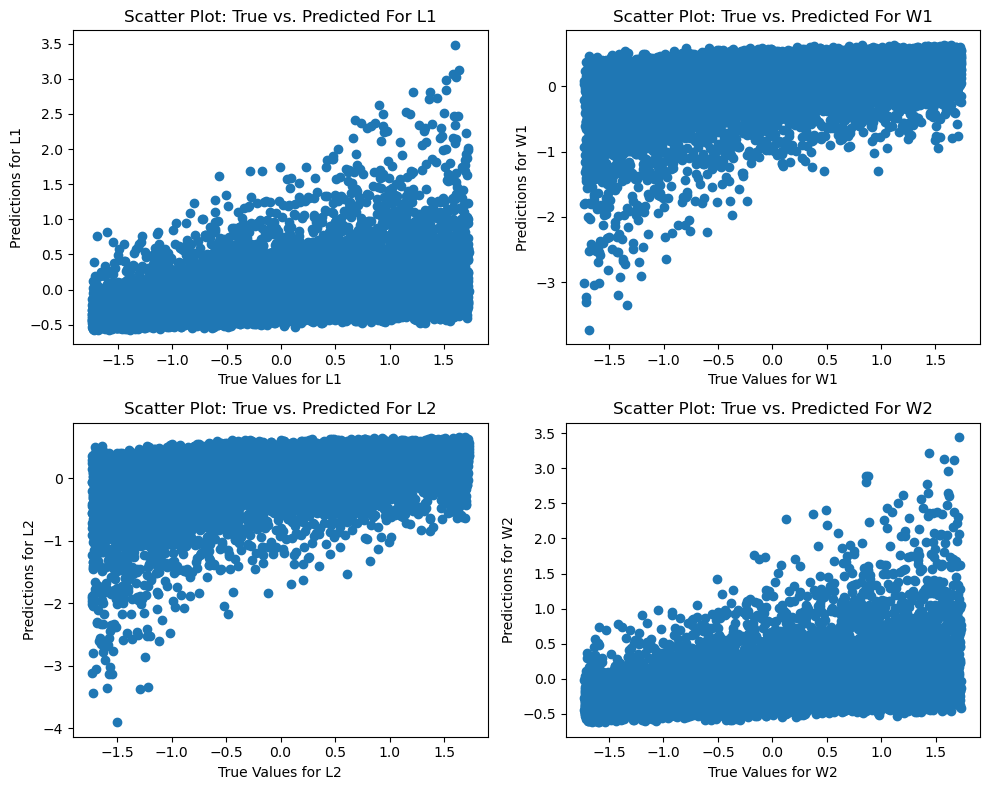

In [15]:
# Create a scatterplot of the real test values versus the predicted values

fig, axs = plt.subplots(2, 2, figsize=(10,8))

axs[0,0].scatter(y_test_L1, predictions_L1)
axs[0,0].set_title('Scatter Plot: True vs. Predicted For L1')
axs[0,0].set_xlabel('True Values for L1')
axs[0,0].set_ylabel('Predictions for L1')

axs[1,0].scatter(y_test_L2, predictions_L2)
axs[1,0].set_title('Scatter Plot: True vs. Predicted For L2')
axs[1,0].set_xlabel('True Values for L2')
axs[1,0].set_ylabel('Predictions for L2')

axs[0,1].scatter(y_test_W1, predictions_W1)
axs[0,1].set_title('Scatter Plot: True vs. Predicted For W1')
axs[0,1].set_xlabel('True Values for W1')
axs[0,1].set_ylabel('Predictions for W1')

axs[1,1].scatter(y_test_W2, predictions_W2)
axs[1,1].set_title('Scatter Plot: True vs. Predicted For W2')
axs[1,1].set_xlabel('True Values for W2')
axs[1,1].set_ylabel('Predictions for W2')

plt.tight_layout()

plt.show()

In [16]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

mse_L1 = mean_squared_error(y_test_L1, predictions_L1)
mse_L2 = mean_squared_error(y_test_L2, predictions_L2)
mse_W1 = mean_squared_error(y_test_W1, predictions_W1)
mse_W2 = mean_squared_error(y_test_W2, predictions_W2)

rmse_L1 = np.sqrt(mean_squared_error(y_test_L1, predictions_L1))
rmse_L2 = np.sqrt(mean_squared_error(y_test_L2, predictions_L2))
rmse_W1 = np.sqrt(mean_squared_error(y_test_W1, predictions_W1))
rmse_W2 = np.sqrt(mean_squared_error(y_test_W2, predictions_W2))

mae_L1 = mean_absolute_error(y_test_L1, predictions_L1) 
mae_L2 = mean_absolute_error(y_test_L2, predictions_L2) 
mae_W1 = mean_absolute_error(y_test_W1, predictions_W1) 
mae_W2 = mean_absolute_error(y_test_W2, predictions_W2) 

print("MSE for L1:", mse_L1)
print("MSE for L2:", mse_L2)
print("MSE for W1:", mse_W1)
print("MSE for W2:", mse_W2)

print("\nRMSE for L1:", rmse_L1)
print("RMSE for L2:", rmse_L2)
print("RMSE for W1:", rmse_W1)
print("RMSE for W2:", rmse_W2)

print("\nMAE for L1:", mae_L1)
print("MAE for L2:", mae_L2)
print("MAE for W1:", mae_W1)
print("MAE for W2:", mae_W2)

MSE for L1: 0.8109528960236176
MSE for L2: 0.7762435713096345
MSE for W1: 0.7859362975762736
MSE for W2: 0.8034385683965621

RMSE for L1: 0.9005292310767139
RMSE for L2: 0.8810468610179792
RMSE for W1: 0.886530483162465
RMSE for W2: 0.896347348072477

MAE for L1: 0.767565638319644
MAE for L2: 0.7418022593741647
MAE for W1: 0.7501579492685947
MAE for W2: 0.7603622734271643


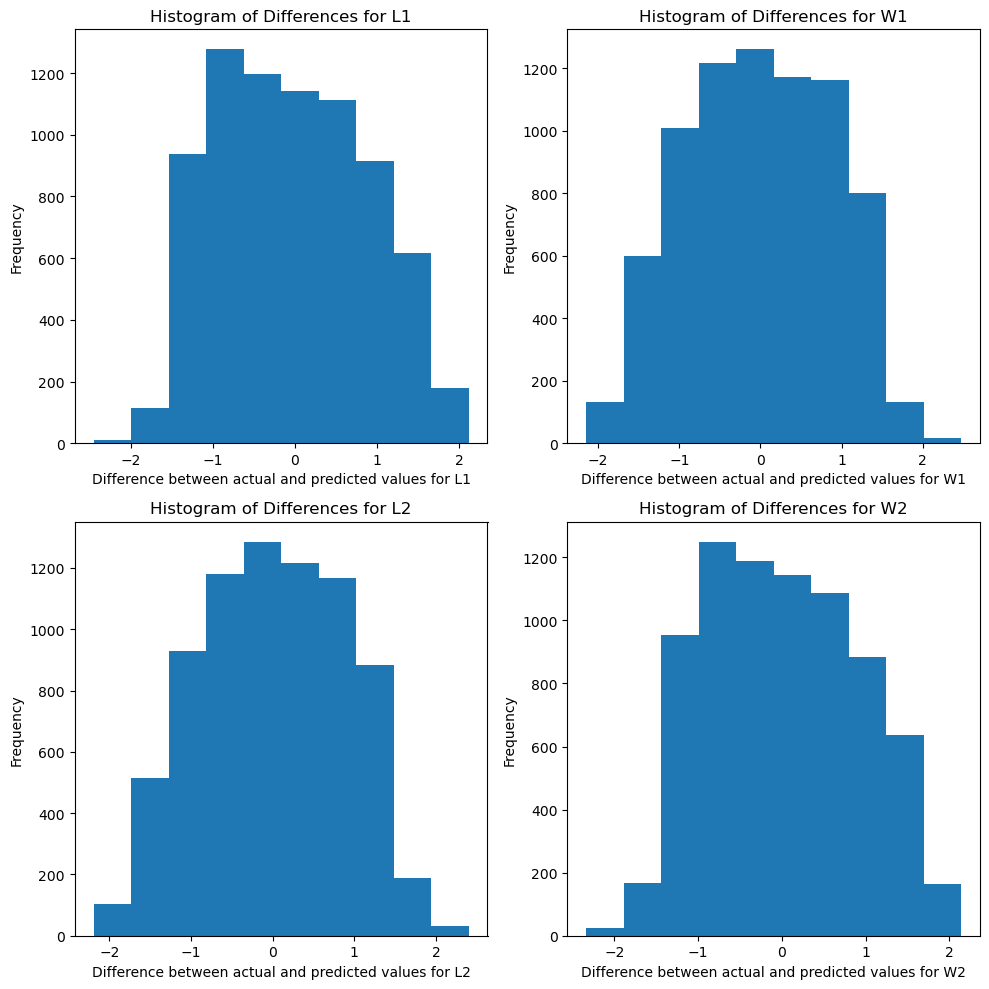

In [17]:
# Show a histogram of the difference between the actual and predicted value of the test data set.

difference_L1 = y_test_L1 - predictions_L1
difference_L2 = y_test_L2 - predictions_L2
difference_W1 = y_test_W1 - predictions_W1
difference_W2 = y_test_W2 - predictions_W2

fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].hist(difference_L1, bins = 10)
axs[0,0].set_title('Histogram of Differences for L1')
axs[0,0].set_xlabel('Difference between actual and predicted values for L1')
axs[0,0].set_ylabel('Frequency')

axs[1,0].hist(difference_L2, bins = 10)
axs[1,0].set_title('Histogram of Differences for L2')
axs[1,0].set_xlabel('Difference between actual and predicted values for L2')
axs[1,0].set_ylabel('Frequency')

axs[0,1].hist(difference_W1, bins = 10)
axs[0,1].set_title('Histogram of Differences for W1')
axs[0,1].set_xlabel('Difference between actual and predicted values for W1')
axs[0,1].set_ylabel('Frequency')

axs[1,1].hist(difference_W2, bins = 10)
axs[1,1].set_title('Histogram of Differences for W2')
axs[1,1].set_xlabel('Difference between actual and predicted values for W2')
axs[1,1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()